<a href="https://colab.research.google.com/github/phong0104/Study_Pandas300/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_300%EC%A0%9C_201_300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 201~210 : 데이터프레임 reshape

https://wikidocs.net/174295

In [ ]:
import pandas as pd
from datetime import datetime

data = {
    'Date': [datetime(2020, 12, 1), datetime(2021, 12, 1)],
    '삼성전자': [21.09, 13.55],
    '카카오': [221.53, 35.92],
    'NAVER': [47.97, 3.77],
    'SK하이닉스': [18.14, 9.93],
    '현대차': [37.33, 11.71]
}

df = pd.DataFrame(data=data)

In [ ]:
df

,Date,삼성전자,카카오,NAVER,SK하이닉스,현대차
0,2020-12-01,21.09,221.53,47.97,18.14,37.33
1,2021-12-01,13.55,35.92,3.77,9.93,11.71


In [ ]:
df2 = pd.melt(df, id_vars=['Date'], var_name='종목명', value_name='PER')

In [ ]:
df2

,Date,종목명,PER
0,2020-12-01,삼성전자,21.09
1,2021-12-01,삼성전자,13.55
2,2020-12-01,카카오,221.53
3,2021-12-01,카카오,35.92
4,2020-12-01,NAVER,47.97
5,2021-12-01,NAVER,3.77
6,2020-12-01,SK하이닉스,18.14
7,2021-12-01,SK하이닉스,9.93
8,2020-12-01,현대차,37.33
9,2021-12-01,현대차,11.71


In [ ]:
import pandas as pd

data = [
    ["2021-08-12", "삼성전자", 77000],
    ["2021-08-13", "삼성전자", 74400],
    ["2021-08-12", "LG전자", 153000],
    ["2021-08-13", "LG전자", 150500],
    ["2021-08-12", "SK하이닉스", 100500],
    ["2021-08-13", "SK하이닉스", 101500]
]
columns = ["날짜", "종목명", "종가"]
df = pd.DataFrame(data=data, columns=columns)

In [ ]:
df

,날짜,종목명,종가
0,2021-08-12,삼성전자,77000
1,2021-08-13,삼성전자,74400
2,2021-08-12,LG전자,153000
3,2021-08-13,LG전자,150500
4,2021-08-12,SK하이닉스,100500
5,2021-08-13,SK하이닉스,101500


In [ ]:
pivoted = pd.pivot(df, index='날짜', columns='종목명', values='종가')
pivoted

종목명,LG전자,SK하이닉스,삼성전자
날짜,,,
2021-08-12,153000,100500,77000
2021-08-13,150500,101500,74400


In [ ]:
pd.pivot(df, index='종목명', columns='날짜', values='종가')

날짜,2021-08-12,2021-08-13
종목명,,
LG전자,153000,150500
SK하이닉스,100500,101500
삼성전자,77000,74400


In [ ]:
import pandas as pd
from datetime import datetime

arrays = [
    ['영업이익', '영업이익', '당기순이익', '당기순이익'],
    ['컨센서스', '잠정치', '컨센서스', '잠정치']
]

columns = pd.MultiIndex.from_arrays(arrays)
index = [datetime(2020, 6, 1), datetime(2020, 9, 1)]
data = [
    [100, 900, 800, 700],
    [1200, 1400, 900, 800]
]
df = pd.DataFrame(data=data, index=index, columns=columns)

In [ ]:
df

영업이익       당기순이익     
            컨센서스   잠정치  컨센서스  잠정치
2020-06-01   100   900   800  700
2020-09-01  1200  1400   900  800

check

In [ ]:
stacked = df.stack()
stacked

당기순이익  영업이익
2020-06-01 잠정치     700   900
           컨센서스    800   100
2020-09-01 잠정치     800  1400
           컨센서스    900  1200

In [ ]:
df.stack(level=0)

잠정치  컨센서스
2020-06-01 당기순이익   700   800
           영업이익    900   100
2020-09-01 당기순이익   800   900
           영업이익   1400  1200

In [ ]:
stacked.unstack()

당기순이익       영업이익      
             잠정치 컨센서스   잠정치  컨센서스
2020-06-01   700  800   900   100
2020-09-01   800  900  1400  1200

In [ ]:
import numpy as np
arr = np.array([1, 7, 5, 4, 6, 3])

check

In [ ]:
pd.cut(arr, 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [ ]:
import numpy as np 
arr = np.array([1,  7,  5,  4,  6,  3])

check

In [ ]:
pd.cut(arr, 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

In [ ]:
import pandas as pd

scores = [90, 55, 73, 87, 80, 66, 40, 100]
s = pd.Series(scores)

In [ ]:
s

0     90
1     55
2     73
3     87
4     80
5     66
6     40
7    100
dtype: int64

In [ ]:
import pandas as pd

scores = [0, 90, 55, 73, 87, 80, 66, 40, 100]
s = pd.Series(scores)
pd.cut(s, 
       bins=[0, 60, 70, 80, 90, 101], 
       right=False,
       include_lowest = False,
       labels=["가","양","미","우","수"])

0    가
1    수
2    가
3    미
4    우
5    우
6    양
7    가
8    수
dtype: category
Categories (5, object): ['가' < '양' < '미' < '우' < '수']

### 211 ~ 220 : 시각화

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr

df = fdr.DataReader("KS11")
df2021 = df.loc['2021']
df2021

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,2874.500000,2946.540039,2869.110107,2944.449951,2944.449951,1026500.0
2021-01-05,2943.669922,2990.570068,2921.840088,2990.570068,2990.570068,1519900.0
2021-01-06,2993.340088,3027.159912,2961.370117,2968.209961,2968.209961,1793400.0
2021-01-07,2980.750000,3055.280029,2980.750000,3031.679932,3031.679932,1524700.0
2021-01-08,3040.110107,3161.110107,3040.110107,3152.179932,3152.179932,1297900.0
...,...,...,...,...,...,...
2021-12-24,3009.479980,3025.770020,3009.479980,3012.429932,3012.429932,537500.0
2021-12-27,3013.939941,3017.310059,2999.300049,2999.550049,2999.550049,475000.0
2021-12-28,3006.770020,3020.290039,2991.550049,3020.239990,3020.239990,607000.0


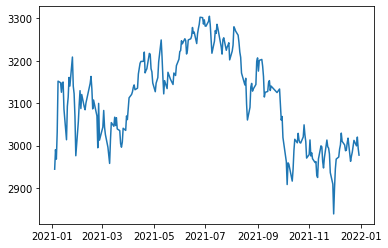

In [ ]:
plt.plot(df2021['Close'])

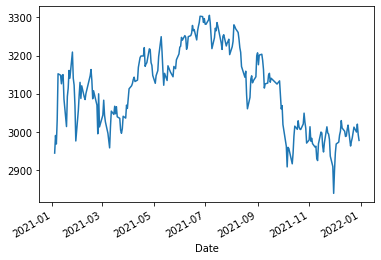

In [ ]:
df2021['Close'].plot()

In [ ]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


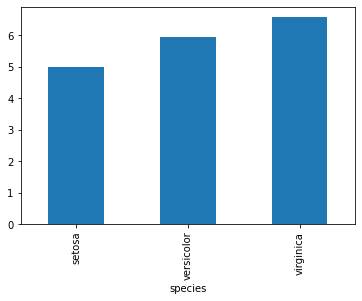

In [ ]:
iris.groupby('species')['sepal_length'].mean().plot(kind='bar')

In [ ]:
df = iris.groupby('species')['sepal_length'].mean()
df

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [ ]:
df.index

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')

In [ ]:
df.values

array([5.006, 5.936, 6.588])

<BarContainer object of 3 artists>

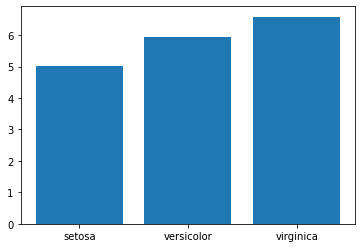

In [ ]:
plt.bar(df.index, df.values)

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


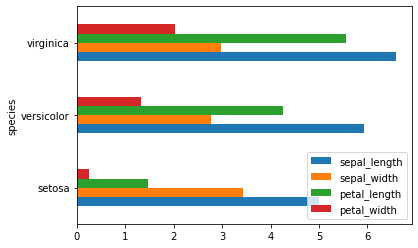

In [ ]:
iris.groupby('species').mean().plot(kind='barh')

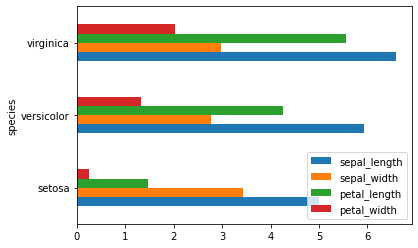

In [ ]:
iris.groupby('species').mean().plot.barh()

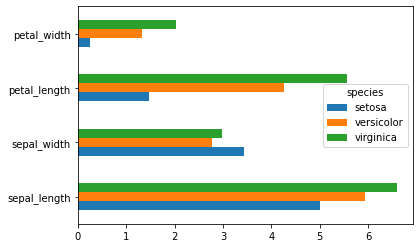

In [ ]:
iris.groupby('species').mean().T.plot.barh()

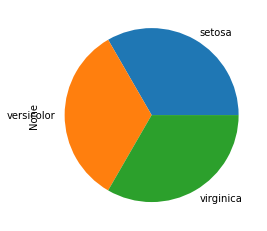

In [ ]:
iris.groupby('species').size().plot(kind='pie')

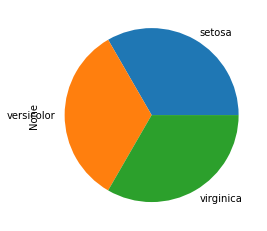

In [ ]:
iris.groupby('species').size().plot.pie()

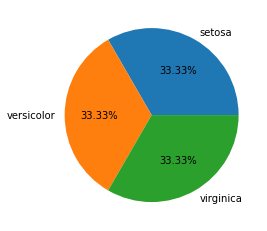

In [ ]:
s = iris.groupby('species')['sepal_length'].count()
s.name = ''
s.plot.pie(autopct='%.2f%%')

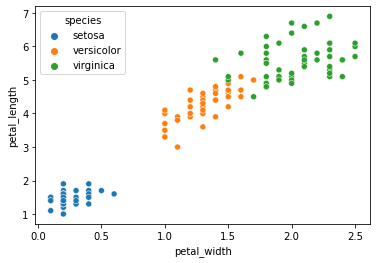

In [ ]:
sns.scatterplot(x = 'petal_width', y = 'petal_length', data = iris, hue='species');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


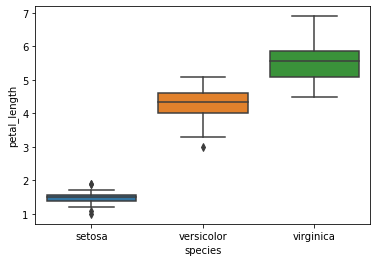

In [ ]:
sns.boxplot(iris['species'], iris['petal_length'])

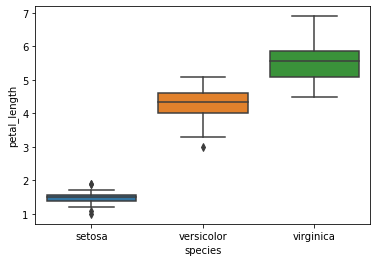

In [ ]:
sns.boxplot(x='species', y='petal_length', data=iris)

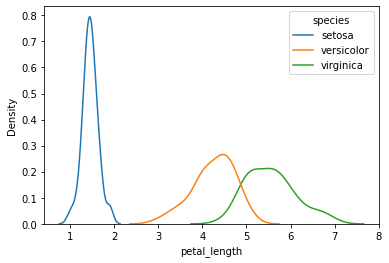

In [ ]:
sns.kdeplot(iris['petal_length'],  hue='species', data=iris)

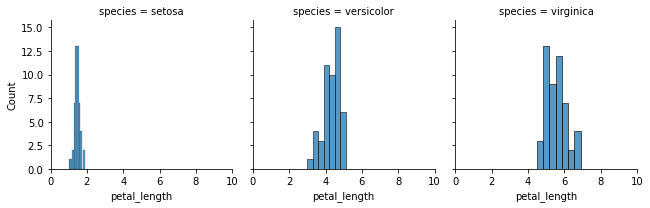

In [ ]:
g = sns.FacetGrid(iris, col='species')
g.set(xlim=(0,10))
g.map(sns.histplot, 'petal_length')

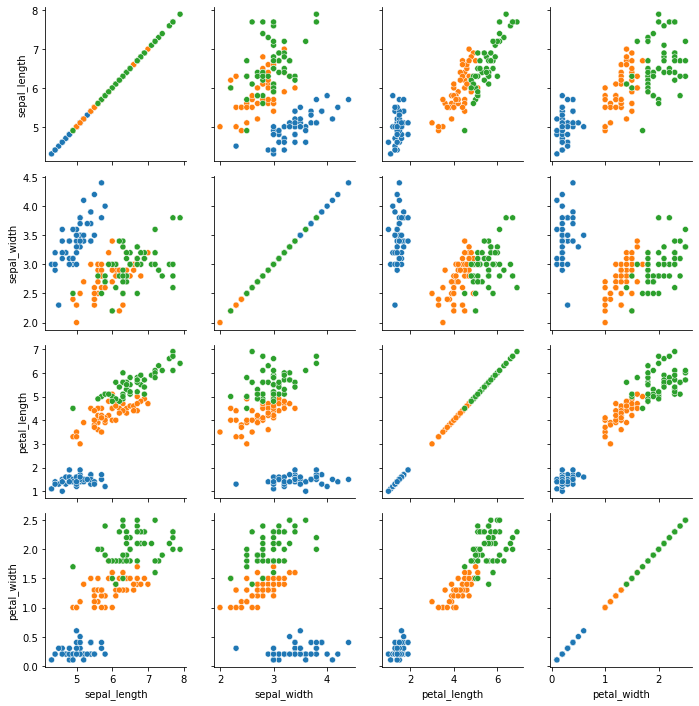

In [ ]:
p = sns.PairGrid(iris, hue='species') # 쌍으로 관계를 보기 위해서 확인
p.map(sns.scatterplot)

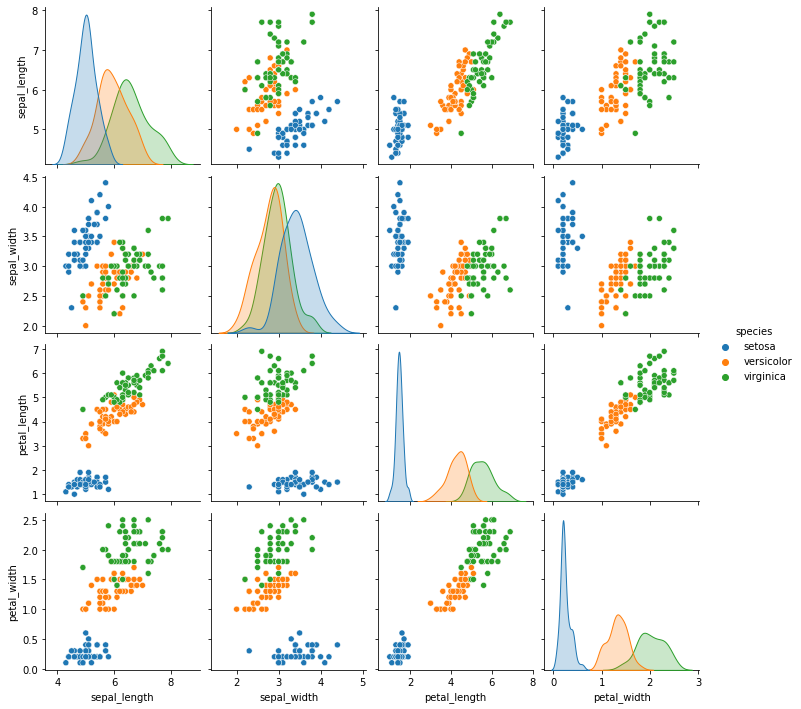

In [ ]:
sns.pairplot(iris, hue='species')

### 221 ~ 230 : 시계열 데이터

datetime - now

In [ ]:
from datetime import datetime

print(datetime.now())

2022-11-02 23:11:59.440208


In [ ]:
datetime.now()

datetime.datetime(2022, 11, 2, 23, 12, 5, 663215)

datetime - year, month, day

In [ ]:
now = datetime.now()
print(now.year, now.month, now.day)

2022 11 2


timedelta

In [ ]:
from datetime import timedelta

now = datetime.now()
tomorrow = now + timedelta(days=1)
print(tomorrow)

2022-11-03 23:13:46.285186


In [ ]:
from datetime import timedelta

now = datetime.now()
yesterday = now + timedelta(days=-1)
print(yesterday)

2022-11-01 23:15:15.232030


In [ ]:
from datetime import timedelta

now = datetime.now()
kst = now + timedelta(hours=9)
print(kst)

2022-11-03 08:16:24.141267


strftime

In [ ]:
from datetime import datetime

now = datetime.now()
now.strftime('%Y-%m-%d')

'2022-11-02'

In [ ]:
now

datetime.datetime(2022, 11, 2, 23, 18, 1, 561033)

In [ ]:
print(now)

2022-11-02 23:18:01.561033


In [ ]:
now.strftime('%Y-%m-%d %H:%M:%S')

'2022-11-02 23:18:01'

strptime

In [ ]:
dt_fmt = '2023-01-01 00:00:00'
datetime.strptime(dt_fmt, '%Y-%m-%d %H:%M:%S')

datetime.datetime(2023, 1, 1, 0, 0)

check

- strftime : string formatted time
- strptime : 

pandas.to_datetime

In [ ]:
date_fmt = ["2022-09-09 00:00:00", "2022-09-09 00:00:01", "2022-09-09 00:00:02"]

In [ ]:
import pandas as pd

ts = pd.to_datetime(date_fmt)

In [ ]:
ts

DatetimeIndex(['2022-09-09 00:00:00', '2022-09-09 00:00:01',
               '2022-09-09 00:00:02'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
ts[0]

Timestamp('2022-09-09 00:00:00')

In [ ]:
ts[1]

Timestamp('2022-09-09 00:00:01')

datetime 객체 생성

In [ ]:
pd.to_datetime('2023-01-01 00:00:00')

Timestamp('2023-01-01 00:00:00')

In [ ]:
from datetime import datetime

dt = datetime(year=2023, month=1, day=1, hour=0, minute=0, second=0)
dt

datetime.datetime(2023, 1, 1, 0, 0)

In [ ]:
dt.year

2023

### 231 ~ 240

datetime

In [ ]:
import numpy as np

data = {
    "카카오": [np.nan, 221, 35], 
    "NAVER": [52, 47, 3],
    "삼성전자": [17, 21, 13]
}

index = [datetime(2019, 12, 1), datetime(2020, 12, 1), datetime(2021, 12, 1)]

In [ ]:
df = pd.DataFrame(data=data, index=index)
df

,카카오,NAVER,삼성전자
2019-12-01,NaN,52,17
2020-12-01,221.0,47,21
2021-12-01,35.0,3,13


dtype

In [ ]:
df.index

DatetimeIndex(['2019-12-01', '2020-12-01', '2021-12-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
df.index.dtype

dtype('<M8[ns]')

Timestamp

In [ ]:
df.index[0]

Timestamp('2019-12-01 00:00:00')

시계열 데이터 인덱싱

In [ ]:
import pandas as pd
from datetime import datetime

data = {
    "카카오": [np.nan, 221, 35], 
    "NAVER": [52, 47, 3],
    "삼성전자": [17, 21, 13]
}
index = [datetime(2019, 12, 1), datetime(2020, 12, 1), datetime(2021, 12, 1)]
df = pd.DataFrame(data=data, index=index)

df

,카카오,NAVER,삼성전자
2019-12-01,NaN,52,17
2020-12-01,221.0,47,21
2021-12-01,35.0,3,13


check - 신기

In [ ]:
df.loc["2021"]

,카카오,NAVER,삼성전자
2021-12-01,35.0,3,13


pandas.date_range

In [ ]:
dt_range = pd.date_range(start='2022-01-01', end='2022-12-31')
dt_range

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [ ]:
dt = pd.date_range(start='2023-01-01', periods=31)
dt

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
dt = pd.date_range(start='2023-01-01 09:00:00', periods=5)
dt

DatetimeIndex(['2023-01-01 09:00:00', '2023-01-02 09:00:00',
               '2023-01-03 09:00:00', '2023-01-04 09:00:00',
               '2023-01-05 09:00:00'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 6.2 MB/s 


In [ ]:
import pyupbit

df = pyupbit.get_ohlcv("KRW-BTC")
df

,open,high,low,close,volume,value
2022-04-19 09:00:00,50768000.0,51904000.0,50550000.0,51458000.0,2813.977539,1.440339e+11
2022-04-20 09:00:00,51459000.0,52326000.0,51015000.0,51388000.0,2789.563537,1.440369e+11
2022-04-21 09:00:00,51436000.0,53075000.0,50250000.0,50805000.0,4540.571121,2.358681e+11
2022-04-22 09:00:00,50805000.0,51000000.0,49526000.0,49937000.0,3309.376270,1.665184e+11
2022-04-23 09:00:00,49937000.0,50290000.0,49466000.0,49742000.0,1905.146898,9.487886e+10
...,...,...,...,...,...,...
2022-10-31 09:00:00,28957000.0,29217000.0,28580000.0,28778000.0,3780.017757,1.091265e+11
2022-11-01 09:00:00,28778000.0,28928000.0,28634000.0,28749000.0,2933.716643,8.443021e+10
2022-11-02 09:00:00,28753000.0,29299000.0,28500000.0,28632000.0,7547.861369,2.176693e+11
2022-11-03 09:00:00,28632000.0,28900000.0,28443000.0,28693000.0,6757.692914,1.940869e+11


In [ ]:
print(df.index.tz)

None


In [ ]:
now = datetime.now()
now

datetime.datetime(2022, 11, 4, 14, 4, 30, 129071)

In [ ]:
now.timestamp()

1667570670.129071

In [ ]:
int(now.timestamp())

1667570670

pandas.Timestamp

In [ ]:
now = datetime.now()
now

datetime.datetime(2022, 11, 4, 14, 5, 18, 950696)

In [ ]:
now.timestamp()

1667570718.950696

In [ ]:
pd.to_datetime(now.timestamp())

Timestamp('1970-01-01 00:00:01.667570718')

In [ ]:
now

datetime.datetime(2022, 11, 4, 14, 5, 18, 950696)

In [ ]:
ts = pd.Timestamp(now)
ts

Timestamp('2022-11-04 14:05:18.950696')

In [ ]:
ts.to_pydatetime()

datetime.datetime(2022, 11, 4, 14, 5, 18, 950696)

In [ ]:
!git clone https://github.com/phong0104/Study_Pandas300

Cloning into 'Study_Pandas300'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
import pandas as pd

filepath = '/content/Study_Pandas300/vgsales.csv'

df = pd.read_csv(filepath)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.set_index('Rank')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


sort_values

In [ ]:
df.sort_values(by='Global_Sales', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16187,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16188,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16189,16192,Sonic & All-Stars Racing Transformed,PC,2013.0,Racing,Sega,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.sort_values(by=['Platform', 'Global_Sales'], ascending=[True, False])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
239,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.50
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
544,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16530,16533,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.0,0.00,0.01
16531,16534,Hitman (2016),XOne,2016.0,Action,Square Enix,0.00,0.01,0.0,0.00,0.01
16562,16565,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.0,0.00,0.01
16569,16572,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.0,0.00,0.01


In [ ]:
df['Year'].dropna(inplace=True)

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Check

dropna

In [ ]:
df.dropna(subset=['Year'], inplace=True)

In [ ]:
df.dropna(subset=['Year'], inplace=True)

In [ ]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

astype

In [ ]:
df['Year'].astype(int)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16327, dtype: int64

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


value_counts

In [ ]:
df['Genre'].value_counts()

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

value_counts(normalize)

In [ ]:
df['Genre'].value_counts(normalize=True)

Action          0.199241
Sports          0.141116
Misc            0.104734
Role-Playing    0.090096
Shooter         0.078520
Adventure       0.078153
Racing          0.075090
Platform        0.053653
Simulation      0.052122
Fighting        0.051204
Strategy        0.041098
Puzzle          0.034973
Name: Genre, dtype: float64

In [ ]:
df['Genre'].value_counts(normalize=False)

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

In [ ]:
df['Genre'].value_counts(normalize=True) * 100

Action          19.924052
Sports          14.111594
Misc            10.473449
Role-Playing     9.009616
Shooter          7.852024
Adventure        7.815275
Racing           7.509034
Platform         5.365346
Simulation       5.212225
Fighting         5.120353
Strategy         4.109757
Puzzle           3.497274
Name: Genre, dtype: float64

series.str.contains

In [ ]:
cond = df['Name'].str.contains('Super Mario')
df[cond]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
21,22,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
22,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
46,47,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89
48,49,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
53,54,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79


groupby

In [ ]:
df.groupby(['Platform', 'Genre'])[['Global_Sales']].sum()

Global_Sales
Platform Genre                     
2600     Action               26.39
         Adventure             0.40
         Fighting              0.77
         Misc                  3.58
         Platform             13.27
...                             ...
XOne     Role-Playing          9.48
         Shooter              51.61
         Simulation            0.54
         Sports               23.97
         Strategy              0.38

[293 rows x 1 columns]

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
pd.melt(
    df,
    id_vars=['Name', 'Platform', 'Genre'],
    value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
    var_name='Region',
    value_name='Sales'
)

,Name,Platform,Genre,Region,Sales
0,Wii Sports,Wii,Sports,NA_Sales,41.49
1,Super Mario Bros.,NES,Platform,NA_Sales,29.08
2,Mario Kart Wii,Wii,Racing,NA_Sales,15.85
3,Wii Sports Resort,Wii,Sports,NA_Sales,15.75
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,NA_Sales,11.27
...,...,...,...,...,...
65303,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Other_Sales,0.00
65304,Men in Black II: Alien Escape,GC,Shooter,Other_Sales,0.00
65305,SCORE International Baja 1000: The Official Game,PS2,Racing,Other_Sales,0.00
65306,Know How 2,DS,Puzzle,Other_Sales,0.00


In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 251 ~ 260 팁 데이터 

In [ ]:
import seaborn as sns

tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips.groupby('sex')[['tip']].mean()

,tip
sex,
Male,3.089618
Female,2.833448


In [ ]:
tips.groupby('day')[['tip']].mean()

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


In [ ]:
tips.groupby('time')[['tip']].mean()

,tip
time,
Lunch,2.728088
Dinner,3.102670


In [ ]:
tips['smoker']

0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: category
Categories (2, object): ['Yes', 'No']

In [ ]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [ ]:
tips['smoker'].value_counts(normalize=True) * 100

No     61.885246
Yes    38.114754
Name: smoker, dtype: float64

In [ ]:
smoker = tips['smoker'].value_counts()
smoker['Yes']

93

In [ ]:
smoker['Yes'] * 100 / smoker.sum()

38.114754098360656

In [ ]:
tips.groupby(['sex','smoker'])[['total_bill', 'tip']].mean()

total_bill       tip
sex    smoker                      
Male   Yes      22.284500  3.051167
       No       19.791237  3.113402
Female Yes      17.977879  2.931515
       No       18.105185  2.773519

In [ ]:
tips.sort_values(by='total_bill')

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
59,48.27,6.73,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


#### nunique

In [ ]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
tips['day'].nunique()

4

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### pandas cut

In [ ]:
tips['total_bill_category'] = pd.cut(tips['total_bill'], 3, labels=['low', 'medium', 'high'])

tips.groupby('total_bill_category')[['tip']].mean()

,tip
total_bill_category,
low,2.357429
medium,3.634432
high,5.106875


In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size,total_bill_category
0,16.99,1.01,Female,No,Sun,Dinner,2,low
1,10.34,1.66,Male,No,Sun,Dinner,3,low
2,21.01,3.50,Male,No,Sun,Dinner,3,medium
3,23.68,3.31,Male,No,Sun,Dinner,2,medium
4,24.59,3.61,Female,No,Sun,Dinner,4,medium
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,medium
240,27.18,2.00,Female,Yes,Sat,Dinner,2,medium
241,22.67,2.00,Male,Yes,Sat,Dinner,2,medium
242,17.82,1.75,Male,No,Sat,Dinner,2,low


In [ ]:
tips.groupby(['size'])[['total_bill', 'tip']].mean()

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


In [ ]:
tips.groupby(['day','time'])[['tip']].count()

tip
day  time       
Thur Lunch    61
     Dinner    1
Fri  Lunch     7
     Dinner   12
Sat  Lunch     0
     Dinner   87
Sun  Lunch     0
     Dinner   76

### 261 ~ 270 붓꽃 데이터

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
type(iris)

pandas.core.frame.DataFrame

In [ ]:
iris.columns = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']

In [ ]:
iris

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.loc[1]

꽃받침길이       4.9
꽃받침너비       3.0
꽃잎길이        1.4
꽃잎너비        0.2
품종       setosa
Name: 1, dtype: object

In [ ]:
iris.iloc[0:50]

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
iris[ iris['품종'] == 'setosa']

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
iris[ ['꽃받침길이', '꽃받침너비', '품종'] ]

,꽃받침길이,꽃받침너비,품종
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


In [ ]:
iris.iloc[:, [0,1,4]]

,꽃받침길이,꽃받침너비,품종
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


In [ ]:
import math
import time

start = time.time()

iris['품종'] = iris['품종'].str[5:]

end = time.time()

print(f"{end - start:.5f} sec")

0.00386 sec


In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
import math
import time

start = time.time()

iris['품종'] = iris['품종'].str.replace('Iris-','')

end = time.time()

print(f"{end - start:.5f} sec")

series.str

groupby

In [ ]:
iris.groupby('품종').mean()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
품종,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
iris['품종'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: 품종, dtype: int64

In [ ]:
import pandas as pd

pd.melt(iris,
        value_vars=['꽃받침길이','꽃받침너비','꽃잎길이','꽃잎너비'],
        )

,variable,value
0,꽃받침길이,5.1
1,꽃받침길이,4.9
2,꽃받침길이,4.7
3,꽃받침길이,4.6
4,꽃받침길이,5.0
...,...,...
595,꽃잎너비,2.3
596,꽃잎너비,1.9
597,꽃잎너비,2.0
598,꽃잎너비,2.3


### 271 ~ 280 타이타닉

In [ ]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

groupby mean

In [ ]:
titanic.groupby('pclass')[['fare']].mean()

,fare
pclass,
1,84.154687
2,20.662183
3,13.675550


isnull().sum()

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

sum and len

In [ ]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
female = titanic[ titanic['sex'] == 'female' ]['survived']
female

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: survived, Length: 314, dtype: int64

In [ ]:
rate = sum(female) / len(female)
rate

0.7420382165605095

groupby apply and lambda function

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.groupby('sex')[['survived']].apply(lambda x: sum(x) / len(x) * 100)

TypeError: ignored

In [ ]:
titanic.groupby('class')['survived'].apply(lambda x: sum(x) / len(x) * 100)

class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64

dropna

In [ ]:
titanic.dropna(subset=['age'], inplace=True)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [ ]:
def age_grp(x):
    if x < 18:
        return '미성년자'
    elif x < 60:
        return '성인'
    else:
        return '노인'

titanic['age_group'] = titanic['age'].apply(age_grp) 

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,성인
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,성인
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,성인
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,성인
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,성인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,성인
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,성인
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,성인
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,성인


In [ ]:
titanic.groupby(['age_group', 'sex'])[['survived']].mean() * 100

survived
age_group sex               
노인        female  100.000000
          male     13.636364
미성년자      female   69.090909
          male     39.655172
성인        female   76.732673
          male     17.962466

In [ ]:
pd.pivot_table(
    data=titanic,
    values='survived',
    index='class',
    columns='sex',
    aggfunc='mean'
)

sex,female,male
class,,
First,0.964706,0.396040
Second,0.918919,0.151515
Third,0.460784,0.150198


### 281 ~ 290 코스피 지수

In [ ]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr

kospi = fdr.DataReader('KS11', '2001')

In [ ]:
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0
...,...,...,...,...,...,...
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0
2022-11-03,2297.449951,2342.860107,2296.439941,2329.169922,2329.169922,550300.0


In [ ]:
kospi['High'].max()

3316.080078

In [ ]:
kospi['Low'].min()

463.540009

In [ ]:
kospi['High'].idxmax()

Timestamp('2021-06-25 00:00:00')

In [ ]:
kospi['Low'].idxmin()

Timestamp('2001-09-21 00:00:00')

check

In [ ]:
kospi['Close']

Date
2001-01-02     520.950012
2001-01-03     521.429993
2001-01-04     558.020020
2001-01-05     580.849976
2001-01-08     586.650024
                 ...     
2022-11-01    2335.219971
2022-11-02    2336.870117
2022-11-03    2329.169922
2022-11-04    2348.429932
2022-11-07    2371.790039
Name: Close, Length: 5474, dtype: float64

In [ ]:
kospi.loc['2001-01-03':,'Close']

Date
2001-01-03     521.429993
2001-01-04     558.020020
2001-01-05     580.849976
2001-01-08     586.650024
2001-01-09     589.919983
                 ...     
2022-11-01    2335.219971
2022-11-02    2336.870117
2022-11-03    2329.169922
2022-11-04    2348.429932
2022-11-07    2371.790039
Name: Close, Length: 5473, dtype: float64

In [ ]:
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0
...,...,...,...,...,...,...
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0
2022-11-03,2297.449951,2342.860107,2296.439941,2329.169922,2329.169922,550300.0


In [ ]:
kospi.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.018736,0.006215,0.019422,0.000921,0.000921,0.405195
2001-01-04,0.075652,0.081170,0.078735,0.070172,0.070172,0.369378
2001-01-05,0.014523,0.025125,0.008150,0.040912,0.040912,0.301012
2001-01-08,0.025342,0.011180,0.030753,0.009985,0.009985,-0.034065
...,...,...,...,...,...,...
2022-11-01,0.003414,0.017451,0.010485,0.018142,0.018142,0.487914
2022-11-02,0.010632,0.004603,0.011229,0.000707,0.000707,-0.246022
2022-11-03,-0.012296,-0.001475,-0.011591,-0.003295,-0.003295,0.222346


In [ ]:
kospi['Change'] = kospi['Close'].pct_change(periods=1) * 100
kospi['Change'] = kospi['Change'].apply(lambda x:round(x, 2))
kospi

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00
...,...,...,...,...,...,...,...
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07
2022-11-03,2297.449951,2342.860107,2296.439941,2329.169922,2329.169922,550300.0,-0.33


In [ ]:
kospi

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00
...,...,...,...,...,...,...,...
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07
2022-11-03,2297.449951,2342.860107,2296.439941,2329.169922,2329.169922,550300.0,-0.33


In [ ]:
kospi

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00
...,...,...,...,...,...,...,...
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07
2022-11-03,2297.449951,2342.860107,2296.439941,2329.169922,2329.169922,550300.0,-0.33


In [ ]:
kospi[['Change']]

,Change
Date,
2001-01-02,NaN
2001-01-03,0.09
2001-01-04,7.02
2001-01-05,4.09
2001-01-08,1.00
...,...
2022-11-01,1.81
2022-11-02,0.07
2022-11-03,-0.33


In [ ]:
kospi[['Change']].nlargest(columns='Change', n=5)

,Change
Date,
2008-10-30,11.95
2020-03-24,8.60
2002-02-14,7.64
2008-12-08,7.48
2020-03-20,7.44


In [ ]:
kospi[kospi['Close'] >= 3000].index[0]

Timestamp('2021-01-07 00:00:00')

In [ ]:
kospi[ kospi['Change'] >= 7 ]

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02
2002-02-14,764.150024,796.179993,762.409973,796.179993,796.179993,759500.0,7.64
2008-10-30,1036.829956,1094.890015,992.890015,1084.719971,1084.719971,621600.0,11.95
2008-12-08,1041.410034,1111.270020,1037.640015,1105.050049,1105.050049,541800.0,7.48
2020-03-20,1498.489990,1566.819946,1466.479980,1566.150024,1566.150024,817000.0,7.44
2020-03-24,1523.689941,1609.969971,1508.680054,1609.969971,1609.969971,679300.0,8.60


최다 연속 상승일수

In [ ]:
kospi

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00
...,...,...,...,...,...,...,...
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07
2022-11-03,2297.449951,2342.860107,2296.439941,2329.169922,2329.169922,550300.0,-0.33


In [ ]:
kospi.shift(2)

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN
2001-01-05,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09
2001-01-08,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02
...,...,...,...,...,...,...,...
2022-11-01,2276.729980,2292.649902,2266.439941,2268.399902,2268.399902,427100.0,-0.89
2022-11-02,2293.750000,2295.510010,2273.729980,2293.610107,2293.610107,401300.0,1.11
2022-11-03,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81


In [ ]:
kospi['up'] = kospi['Change'] > 0
kospi['grp'] = (kospi['up'] != kospi['up'].shift()).cumsum()
kospi

,Open,High,Low,Close,Adj Close,Volume,Change,up,grp
Date,,,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN,False,1
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09,True,2
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02,True,2
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09,True,2
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00,True,2
...,...,...,...,...,...,...,...,...,...
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81,True,2724
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07,True,2724
2022-11-03,2297.449951,2342.860107,2296.439941,2329.169922,2329.169922,550300.0,-0.33,False,2725


In [ ]:
kospi['grp'].groupby(kospi['grp'].values).cumcount() + 1

Date
2001-01-02    1
2001-01-03    1
2001-01-04    2
2001-01-05    3
2001-01-08    4
             ..
2022-10-31    1
2022-11-01    2
2022-11-02    3
2022-11-03    1
2022-11-04    1
Length: 5473, dtype: int64

In [ ]:
kospi.groupby(['grp']).cumcount() + 1

Date
2001-01-02    1
2001-01-03    1
2001-01-04    2
2001-01-05    3
2001-01-08    4
             ..
2022-10-31    1
2022-11-01    2
2022-11-02    3
2022-11-03    1
2022-11-04    1
Length: 5473, dtype: int64

In [ ]:
kospi['up_cnt'] = kospi.groupby(['grp']).cumcount() + 1
kospi

,Open,High,Low,Close,Adj Close,Volume,Change,up,grp,up_cnt
Date,,,,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN,False,1,1
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09,True,2,1
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02,True,2,2
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09,True,2,3
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00,True,2,4
...,...,...,...,...,...,...,...,...,...,...
2022-10-31,2293.750000,2295.510010,2273.729980,2293.610107,2293.610107,401300.0,1.11,True,2724,1
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81,True,2724,2
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07,True,2724,3


In [ ]:
kospi['up_cnt'].max()

13

In [ ]:
import FinanceDataReader as fdr

df = fdr.DataReader('KS11', '2001')
df['Change'] = df['Close'].pct_change()
# df['up'] = df['Change'] > 0
# df['grp'] = (df['up'] != df['up'].shift()).cumsum()
# df['up_cnt'] = df.groupby('grp').cumcount() + 1
# df['up_cnt'].max()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.000921
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,0.070172
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,0.040912
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,0.009985
...,...,...,...,...,...,...,...
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,0.018142
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.000707
2022-11-03,2297.449951,2342.860107,2296.439941,2329.169922,2329.169922,550300.0,-0.003295


In [ ]:
import FinanceDataReader as fdr

df = fdr.DataReader('KS11', '2001')
df['Change'] = df['Close'].pct_change(periods=1).apply(lambda x:round(x*100,2))
df['up'] = df['Change'] > 0
df['grp'] = (df['up'] != df['up'].shift()).cumsum()
df['up_cnt'] = df.groupby('grp').cumcount() + 1
df['up_cnt'].max()

In [ ]:
df = fdr.DataReader('KS11', '2001')
df['Change'] = df['Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.000921
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,0.070172
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,0.040912
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,0.009985
...,...,...,...,...,...,...,...
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,0.018142
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.000707
2022-11-03,2297.449951,2342.860107,2296.439941,2329.169922,2329.169922,550300.0,-0.003295


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Change,up,grp,up_cnt
Date,,,,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN,False,1,1
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09,True,2,1
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02,True,2,2
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09,True,2,3
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00,True,2,4
...,...,...,...,...,...,...,...,...,...,...
2022-10-31,2293.750000,2295.510010,2273.729980,2293.610107,2293.610107,401300.0,1.11,True,2724,1
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81,True,2724,2
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07,True,2724,3


최다 연속 하락일수

In [ ]:
df['down'] = df['Change'] < 0
df

,Open,High,Low,Close,Adj Close,Volume,Change,up,grp,up_cnt,down
Date,,,,,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN,False,1,1,False
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09,True,2,1,False
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02,True,2,2,False
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09,True,2,3,False
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00,True,2,4,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,2293.750000,2295.510010,2273.729980,2293.610107,2293.610107,401300.0,1.11,True,2724,1,False
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81,True,2724,2,False
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07,True,2724,3,False


In [ ]:
df['down_grp'] = ( df['down'] != df['down'].shift() ).cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Change,up,grp,up_cnt,down,down_grp
Date,,,,,,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN,False,1,1,False,1
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09,True,2,1,False,1
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02,True,2,2,False,1
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09,True,2,3,False,1
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00,True,2,4,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,2293.750000,2295.510010,2273.729980,2293.610107,2293.610107,401300.0,1.11,True,2724,1,False,2685
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81,True,2724,2,False,2685
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07,True,2724,3,False,2685


In [ ]:
df['down_cnt'] = df.groupby('down_grp').cumcount() + 1
df

,Open,High,Low,Close,Adj Close,Volume,Change,up,grp,up_cnt,down,down_grp,down_cnt
Date,,,,,,,,,,,,,
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,NaN,False,1,1,False,1,1
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,0.09,True,2,1,False,1,2
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,7.02,True,2,2,False,1,3
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,4.09,True,2,3,False,1,4
2001-01-08,573.719971,587.909973,572.479980,586.650024,586.650024,558600.0,1.00,True,2,4,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,2293.750000,2295.510010,2273.729980,2293.610107,2293.610107,401300.0,1.11,True,2724,1,False,2685,1
2022-11-01,2301.580078,2335.570068,2297.570068,2335.219971,2335.219971,597100.0,1.81,True,2724,2,False,2685,2
2022-11-02,2326.050049,2346.320068,2323.370117,2336.870117,2336.870117,450200.0,0.07,True,2724,3,False,2685,3


Check

In [ ]:
df['down_cnt'].max()

13

### 291 ~ 300 부동산

In [ ]:
import pandas as pd

df_m = pd.read_excel("https://drive.google.com/u/0/uc?id=1gVEEFn46Q9DBlgp2e8cTlCXOjbujj_A7&export=download", index_col=0)
df_m.head()

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"68,000",NaN,2006,2021,성남동,금호어울림,1,2,59.93,NaN,3126,41133,9,NaN,NaN
1,"29,500",NaN,2004,2021,성남동,SR하이원,1,2,45.31,NaN,3755,41133,5,NaN,NaN
2,"49,000",NaN,2006,2021,성남동,동부브리앙뜨,1,3,80.49,NaN,2163,41133,3,NaN,NaN
3,"40,800",NaN,1992,2021,성남동,현대,1,7,42.62,NaN,3121,41133,10,NaN,NaN
4,"53,000",NaN,2004,2021,성남동,띠아모,1,7,116.56,NaN,3753,41133,9,NaN,NaN


데이터 타입 변경

In [ ]:
df_m['거래금액'] = df_m['거래금액'].str.replace(',','')
df_m['거래금액'] = df_m['거래금액'].astype(int)
df_m['거래금액'].dtype

dtype('int64')

In [ ]:
df_m

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,68000,NaN,2006,2021,성남동,금호어울림,1,2,59.93,NaN,3126,41133,9,NaN,NaN
1,29500,NaN,2004,2021,성남동,SR하이원,1,2,45.31,NaN,3755,41133,5,NaN,NaN
2,49000,NaN,2006,2021,성남동,동부브리앙뜨,1,3,80.49,NaN,2163,41133,3,NaN,NaN
3,40800,NaN,1992,2021,성남동,현대,1,7,42.62,NaN,3121,41133,10,NaN,NaN
4,53000,NaN,2004,2021,성남동,띠아모,1,7,116.56,NaN,3753,41133,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,100000,NaN,2012,2021,중앙동,중앙동힐스테이트1차,1,17,120.97,NaN,578,41133,2,NaN,NaN
120,83000,NaN,2014,2021,중앙동,중앙동힐스테이트2차,1,21,59.98,NaN,577,41133,7,NaN,NaN
121,88000,NaN,2012,2021,중앙동,롯데캐슬,1,23,59.93,NaN,710,41133,6,NaN,NaN
122,82500,NaN,2014,2021,중앙동,중앙동힐스테이트2차,1,25,59.98,NaN,577,41133,3,NaN,NaN


In [ ]:
df_m['거래금액'] = df_m['거래금액'].str.replace(',','').astype(int)
df_m.head()

AttributeError: ignored

매매평단가

In [ ]:
df_m['매매평단가'] = df_m['거래금액'] / df_m['전용면적'] * 3.3
df_m

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,매매평단가
0,68000,NaN,2006,2021,성남동,금호어울림,1,2,59.93,NaN,3126,41133,9,NaN,NaN,3744.368430
1,29500,NaN,2004,2021,성남동,SR하이원,1,2,45.31,NaN,3755,41133,5,NaN,NaN,2148.532333
2,49000,NaN,2006,2021,성남동,동부브리앙뜨,1,3,80.49,NaN,2163,41133,3,NaN,NaN,2008.945211
3,40800,NaN,1992,2021,성남동,현대,1,7,42.62,NaN,3121,41133,10,NaN,NaN,3159.080244
4,53000,NaN,2004,2021,성남동,띠아모,1,7,116.56,NaN,3753,41133,9,NaN,NaN,1500.514756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,100000,NaN,2012,2021,중앙동,중앙동힐스테이트1차,1,17,120.97,NaN,578,41133,2,NaN,NaN,2727.949078
120,83000,NaN,2014,2021,중앙동,중앙동힐스테이트2차,1,21,59.98,NaN,577,41133,7,NaN,NaN,4566.522174
121,88000,NaN,2012,2021,중앙동,롯데캐슬,1,23,59.93,NaN,710,41133,6,NaN,NaN,4845.653262
122,82500,NaN,2014,2021,중앙동,중앙동힐스테이트2차,1,25,59.98,NaN,577,41133,3,NaN,NaN,4539.013004


법정동 별로 매매평단가의 평균

In [ ]:
df_m['법정동'].unique()

array(['성남동', '금광동', '은행동', '상대원동', '여수동', '도촌동', '하대원동', '중앙동'],
      dtype=object)

In [ ]:
df_m.groupby('법정동')[['매매평단가']].mean()

,매매평단가
법정동,
금광동,3240.974040
도촌동,3231.935513
상대원동,2789.911981
성남동,2387.478986
여수동,4445.978156
은행동,3268.274510
중앙동,4094.691326
하대원동,2592.894990


In [ ]:
import numpy as np

how = {
    '매매평단가':np.mean
}

t0 = df_m.groupby('법정동').agg( how )
t0

,매매평단가
법정동,
금광동,3240.974040
도촌동,3231.935513
상대원동,2789.911981
성남동,2387.478986
여수동,4445.978156
은행동,3268.274510
중앙동,4094.691326
하대원동,2592.894990


하대원동의 매매평단가

In [ ]:
df_m.loc[ df_m['법정동'] == '하대원동' ].groupby('아파트').agg({'매매평단가':np.mean})

,매매평단가
아파트,
삼남,2027.155016
성남자이,2991.761913
성원초원,2206.619860
아튼빌,3144.589731
태연스카이빌,2186.541613


In [ ]:
df_m.loc[ df_m['법정동'] == '하대원동' ].groupby('아파트')[['매매평단가']].mean()

,매매평단가
아파트,
삼남,2027.155016
성남자이,2991.761913
성원초원,2206.619860
아튼빌,3144.589731
태연스카이빌,2186.541613


In [ ]:
df_m['아파트'].unique()

array(['금호어울림', 'SR하이원', '동부브리앙뜨', '현대', '띠아모', '수산리치빌(101동)', '보미리전빌3',
       '예건췌리쉬', '황송마을(삼익금광2차)', '래미안금광', '삼익금광1차', '단남', '은행주공2',
       '은빛마을(두산위브)', '은행주공', '이튼', '산성', '궁전', '성지', '선경2차', '산호',
       '수산리치빌104동', '상대원삼익', '산들마을2단지', '연꽃마을(4단지)', '센트럴타운(3단지)',
       '휴먼시아섬마을1단지(일부임대)', '휴먼시아섬마을5단지', '아튼빌', '삼남', '성남자이', '성원초원',
       '태연스카이빌', '롯데캐슬', '중앙동힐스테이트2차', '중앙동힐스테이트1차'], dtype=object)

매매평단가와 매매건수

In [ ]:
df_m.loc[ df_m['법정동'] == '하대원동' ].groupby('아파트')[['매매평단가']].count()

,매매평단가
아파트,
삼남,7
성남자이,5
성원초원,1
아튼빌,5
태연스카이빌,1


In [ ]:
def f(x):
    return x

In [ ]:
df_m.loc[ df_m['법정동'] == '하대원동' ].groupby('아파트').agg({'매매평단가':[np.mean, f]})

ValueError: ignored

날짜 변환의 오류

In [ ]:
df_m = df_m.astype({ 
    "년" : str,
    "월" : str,
    "일" : str
})

In [ ]:
df_m['날짜'] = df_m['년'] + df_m['월'] + df_m['일']

In [ ]:
df_m

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,매매평단가,날짜
0,68000,NaN,2006,2021,성남동,금호어울림,1,2,59.93,NaN,3126,41133,9,NaN,NaN,3744.368430,202112
1,29500,NaN,2004,2021,성남동,SR하이원,1,2,45.31,NaN,3755,41133,5,NaN,NaN,2148.532333,202112
2,49000,NaN,2006,2021,성남동,동부브리앙뜨,1,3,80.49,NaN,2163,41133,3,NaN,NaN,2008.945211,202113
3,40800,NaN,1992,2021,성남동,현대,1,7,42.62,NaN,3121,41133,10,NaN,NaN,3159.080244,202117
4,53000,NaN,2004,2021,성남동,띠아모,1,7,116.56,NaN,3753,41133,9,NaN,NaN,1500.514756,202117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,100000,NaN,2012,2021,중앙동,중앙동힐스테이트1차,1,17,120.97,NaN,578,41133,2,NaN,NaN,2727.949078,2021117
120,83000,NaN,2014,2021,중앙동,중앙동힐스테이트2차,1,21,59.98,NaN,577,41133,7,NaN,NaN,4566.522174,2021121
121,88000,NaN,2012,2021,중앙동,롯데캐슬,1,23,59.93,NaN,710,41133,6,NaN,NaN,4845.653262,2021123
122,82500,NaN,2014,2021,중앙동,중앙동힐스테이트2차,1,25,59.98,NaN,577,41133,3,NaN,NaN,4539.013004,2021125


In [ ]:
def f(x): 
    if len(x) == 1: 
        return f"0{x}" 
    else: 
        return x 

df_m['월'] = df_m['월'].map(f) 
df_m['일'] = df_m['일'].map(f) 
df_m['날짜'] = df_m['년'] + df_m['월'] + df_m['일'] 
df_m['날짜'] = pd.to_datetime(df_m['날짜'])
temp = df_m[ ["날짜", "법정동", "아파트", "매매평단가"] ] 
temp.head(2)

,날짜,법정동,아파트,매매평단가
0,2021-01-02,성남동,금호어울림,3744.368430
1,2021-01-02,성남동,SR하이원,2148.532333


In [ ]:
def f(x):
    return f'{int(x):02}'

df_m['월'] = df_m['월'].map(f)
df_m['일'] = df_m['일'].map(f)

df_m['날짜'] = df_m['년'] + df_m['월'] + df_m['일']
df_m

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,매매평단가,날짜
0,68000,NaN,2006,2021,성남동,금호어울림,01,02,59.93,NaN,3126,41133,9,NaN,NaN,3744.368430,20210102
1,29500,NaN,2004,2021,성남동,SR하이원,01,02,45.31,NaN,3755,41133,5,NaN,NaN,2148.532333,20210102
2,49000,NaN,2006,2021,성남동,동부브리앙뜨,01,03,80.49,NaN,2163,41133,3,NaN,NaN,2008.945211,20210103
3,40800,NaN,1992,2021,성남동,현대,01,07,42.62,NaN,3121,41133,10,NaN,NaN,3159.080244,20210107
4,53000,NaN,2004,2021,성남동,띠아모,01,07,116.56,NaN,3753,41133,9,NaN,NaN,1500.514756,20210107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,100000,NaN,2012,2021,중앙동,중앙동힐스테이트1차,01,17,120.97,NaN,578,41133,2,NaN,NaN,2727.949078,20210117
120,83000,NaN,2014,2021,중앙동,중앙동힐스테이트2차,01,21,59.98,NaN,577,41133,7,NaN,NaN,4566.522174,20210121
121,88000,NaN,2012,2021,중앙동,롯데캐슬,01,23,59.93,NaN,710,41133,6,NaN,NaN,4845.653262,20210123
122,82500,NaN,2014,2021,중앙동,중앙동힐스테이트2차,01,25,59.98,NaN,577,41133,3,NaN,NaN,4539.013004,20210125


In [ ]:
df_m['날짜'] = pd.to_datetime(df_m['날짜'])
df_m

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,매매평단가,날짜
0,68000,NaN,2006,2021,성남동,금호어울림,01,02,59.93,NaN,3126,41133,9,NaN,NaN,3744.368430,2021-01-02
1,29500,NaN,2004,2021,성남동,SR하이원,01,02,45.31,NaN,3755,41133,5,NaN,NaN,2148.532333,2021-01-02
2,49000,NaN,2006,2021,성남동,동부브리앙뜨,01,03,80.49,NaN,2163,41133,3,NaN,NaN,2008.945211,2021-01-03
3,40800,NaN,1992,2021,성남동,현대,01,07,42.62,NaN,3121,41133,10,NaN,NaN,3159.080244,2021-01-07
4,53000,NaN,2004,2021,성남동,띠아모,01,07,116.56,NaN,3753,41133,9,NaN,NaN,1500.514756,2021-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,100000,NaN,2012,2021,중앙동,중앙동힐스테이트1차,01,17,120.97,NaN,578,41133,2,NaN,NaN,2727.949078,2021-01-17
120,83000,NaN,2014,2021,중앙동,중앙동힐스테이트2차,01,21,59.98,NaN,577,41133,7,NaN,NaN,4566.522174,2021-01-21
121,88000,NaN,2012,2021,중앙동,롯데캐슬,01,23,59.93,NaN,710,41133,6,NaN,NaN,4845.653262,2021-01-23
122,82500,NaN,2014,2021,중앙동,중앙동힐스테이트2차,01,25,59.98,NaN,577,41133,3,NaN,NaN,4539.013004,2021-01-25


In [ ]:
df_s = pd.read_excel("https://drive.google.com/u/0/uc?id=1akAI69X1J8VL5R0azoGQeEKJ5ttEPrTx&export=download", index_col=0)
df_s.head(2)

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,NaN,2003,NaN,NaN,2021,성남동,"13,000",보미리전빌3,1,0,6,34.10,NaN,NaN,2508,41133,7
1,NaN,1992,NaN,NaN,2021,성남동,"30,000",현대,1,0,9,51.53,NaN,NaN,3121,41133,6


In [ ]:
df_s['보증금액'] = df_s['보증금액'].str.replace(',','').astype(int)

df_s['전세평단가'] = df_s['보증금액'] / df_s['전용면적'] * 3.3

df_s.head()

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층,전세평단가
0,NaN,2003,NaN,NaN,2021,성남동,13000,보미리전빌3,1,0,6,34.1000,NaN,NaN,2508,41133,7,1258.064516
1,NaN,1992,NaN,NaN,2021,성남동,30000,현대,1,0,9,51.5300,NaN,NaN,3121,41133,6,1921.210945
2,NaN,1992,NaN,NaN,2021,성남동,21000,현대,1,0,9,51.5300,NaN,NaN,3121,41133,1,1344.847662
3,NaN,2006,NaN,NaN,2021,성남동,35000,그린빌,1,0,12,84.7832,NaN,NaN,2493,41133,6,1362.298191
4,NaN,2006,NaN,NaN,2021,성남동,65000,금호어울림,1,0,12,84.9600,NaN,NaN,3126,41133,7,2524.717514


In [ ]:
df_s.groupby('법정동')[['전세평단가']].mean()

,전세평단가
법정동,
금광동,1534.072424
도촌동,893.732489
상대원동,978.197479
성남동,1101.450004
여수동,1978.923381
은행동,1043.053289
중앙동,1942.570294
하대원동,1351.372102


In [ ]:
df_s.groupby('법정동').agg({'전세평단가':np.mean})

,전세평단가
법정동,
금광동,1534.072424
도촌동,893.732489
상대원동,978.197479
성남동,1101.450004
여수동,1978.923381
은행동,1043.053289
중앙동,1942.570294
하대원동,1351.372102


In [ ]:
df_s.loc[ df_s['월세금액'] != 0, '보증금액'] = df_s['보증금액'] + df_s['월세금액'] / 40 * 10000

In [ ]:
df_s.loc[ df_s['월세금액'] != 0 ]

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층,전세평단가
5,NaN,1992,NaN,NaN,2021,성남동,30000.0,현대,1,80,13,84.237,NaN,NaN,3121,41133,7,391.751843
9,NaN,1992,NaN,NaN,2021,성남동,6000.0,현대,1,20,25,51.530,NaN,NaN,3121,41133,8,64.040365
10,NaN,2014,NaN,NaN,2021,성남동,13500.0,프레젠티아,1,50,28,16.810,NaN,NaN,4949,41133,6,196.311719
12,NaN,2014,NaN,NaN,2021,성남동,14750.0,프레젠티아,1,55,29,19.000,NaN,NaN,4949,41133,4,173.684211
17,NaN,2006,NaN,NaN,2021,금광동,28000.0,래미안금광,1,100,3,59.900,NaN,NaN,2500,41133,15,165.275459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,NaN,2003,NaN,NaN,2021,하대원동,46000.0,아튼빌,1,160,27,108.810,NaN,NaN,249,41133,14,181.968569
173,NaN,1986,NaN,NaN,2021,하대원동,12000.0,대원,1,40,27,44.440,NaN,NaN,155-2,41133,6,148.514851
176,NaN,2014,NaN,NaN,2021,중앙동,41500.0,중앙동힐스테이트2차,1,10,5,84.980,NaN,NaN,577,41133,9,1514.473994
183,NaN,2012,NaN,NaN,2021,중앙동,50000.0,롯데캐슬,1,120,21,84.940,NaN,NaN,710,41133,16,777.019072


In [ ]:
df_s['전세평단가'] = (df_s['보증금액'] + df_s['월세금액'] / 40 * 10000) / df_s['전용면적'] * 3.3

df_s.groupby('법정동').agg({'전세평단가':np.mean})

,전세평단가
법정동,
금광동,2091.516443
도촌동,1520.188226
상대원동,1366.012200
성남동,1894.217990
여수동,2419.364527
은행동,1154.518912
중앙동,2211.832609
하대원동,1927.192402


In [ ]:
t0 = df_m.groupby('법정동').agg({'매매평단가':np.mean})
t1 = df_s.groupby('법정동').agg({'전세평단가':np.mean})

In [ ]:
t0

,매매평단가
법정동,
금광동,3240.974040
도촌동,3231.935513
상대원동,2789.911981
성남동,2387.478986
여수동,4445.978156
은행동,3268.274510
중앙동,4094.691326
하대원동,2592.894990


In [ ]:
t1

,전세평단가
법정동,
금광동,2091.516443
도촌동,1520.188226
상대원동,1366.012200
성남동,1894.217990
여수동,2419.364527
은행동,1154.518912
중앙동,2211.832609
하대원동,1927.192402


In [ ]:
(t1['전세평단가'] / t0['매매평단가']).to_frame()

,0
법정동,
금광동,0.645336
도촌동,0.470365
상대원동,0.489626
성남동,0.793397
여수동,0.544169
은행동,0.353250
중앙동,0.540171
하대원동,0.743259
